In [2]:
# Import packages
import pandas as pd
import numpy as np
# import pandas_profiling as pp
# from pandas_profiling import ProfileReport
from sklearn.preprocessing import OneHotEncoder


import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import roc_auc_score, plot_roc_curve
from sklearn import preprocessing
from sklearn.impute import SimpleImputer

In [3]:
# import data

In [4]:
df_ind = pd.read_csv("Pump_it_Up_Data_Mining_the_Water_Table_-_Training_set_values.csv", parse_dates=["date_recorded"])

In [5]:
df_dep = pd.read_csv("Pump_it_Up_Data_Mining_the_Water_Table_-_Training_set_labels.csv")

In [6]:
# Shows all columns in dataframe

pd.set_option('display.max_columns', None)

# Converts from scientific notation to standard form (applied to every df in
# this notebook) and rounds to two decimal places

pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [7]:
#look at each dataframe

In [8]:
df_ind.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,69572,6000.00,2011-03-14,Roman,1390,Roman,34.94,-9.86,none,0,Lake Nyasa,Mnyusi B,Iringa,11,5,Ludewa,Mundindi,109,True,GeoData Consultants Ltd,VWC,Roman,False,1999,gravity,gravity,gravity,vwc,user-group,pay annually,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
1,8776,0.00,2013-03-06,Grumeti,1399,GRUMETI,34.70,-2.15,Zahanati,0,Lake Victoria,Nyamara,Mara,20,2,Serengeti,Natta,280,NaN,GeoData Consultants Ltd,Other,NaN,True,2010,gravity,gravity,gravity,wug,user-group,never pay,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
2,34310,25.00,2013-02-25,Lottery Club,686,World vision,37.46,-3.82,Kwa Mahundi,0,Pangani,Majengo,Manyara,21,4,Simanjiro,Ngorika,250,True,GeoData Consultants Ltd,VWC,Nyumba ya mungu pipe scheme,True,2009,gravity,gravity,gravity,vwc,user-group,pay per bucket,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe
3,67743,0.00,2013-01-28,Unicef,263,UNICEF,38.49,-11.16,Zahanati Ya Nanyumbu,0,Ruvuma / Southern Coast,Mahakamani,Mtwara,90,63,Nanyumbu,Nanyumbu,58,True,GeoData Consultants Ltd,VWC,NaN,True,1986,submersible,submersible,submersible,vwc,user-group,never pay,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe
4,19728,0.00,2011-07-13,Action In A,0,Artisan,31.13,-1.83,Shuleni,0,Lake Victoria,Kyanyamisa,Kagera,18,1,Karagwe,Nyakasimbi,0,True,GeoData Consultants Ltd,NaN,NaN,True,0,gravity,gravity,gravity,other,other,never pay,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe


In [9]:
df_ind.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59400 entries, 0 to 59399
Data columns (total 40 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   id                     59400 non-null  int64         
 1   amount_tsh             59400 non-null  float64       
 2   date_recorded          59400 non-null  datetime64[ns]
 3   funder                 55765 non-null  object        
 4   gps_height             59400 non-null  int64         
 5   installer              55745 non-null  object        
 6   longitude              59400 non-null  float64       
 7   latitude               59400 non-null  float64       
 8   wpt_name               59400 non-null  object        
 9   num_private            59400 non-null  int64         
 10  basin                  59400 non-null  object        
 11  subvillage             59029 non-null  object        
 12  region                 59400 non-null  object        
 13  r

In [10]:
df_dep.head()

,id,status_group
0,69572,functional
1,8776,functional
2,34310,functional
3,67743,non functional
4,19728,functional


In [11]:
df_dep.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59400 entries, 0 to 59399
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            59400 non-null  int64 
 1   status_group  59400 non-null  object
dtypes: int64(1), object(1)
memory usage: 928.2+ KB


In [12]:
df_dep['status_group'].value_counts()

functional                 32259
non functional             22824
functional needs repair     4317
Name: status_group, dtype: int64

In [13]:
#merge the two train dataframes- independents variable with dependent variable

In [14]:
df = pd.merge(df_ind, df_dep,on='id')
df

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
0,69572,6000.00,2011-03-14,Roman,1390,Roman,34.94,-9.86,none,0,Lake Nyasa,Mnyusi B,Iringa,11,5,Ludewa,Mundindi,109,True,GeoData Consultants Ltd,VWC,Roman,False,1999,gravity,gravity,gravity,vwc,user-group,pay annually,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
1,8776,0.00,2013-03-06,Grumeti,1399,GRUMETI,34.70,-2.15,Zahanati,0,Lake Victoria,Nyamara,Mara,20,2,Serengeti,Natta,280,NaN,GeoData Consultants Ltd,Other,NaN,True,2010,gravity,gravity,gravity,wug,user-group,never pay,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional
2,34310,25.00,2013-02-25,Lottery Club,686,World vision,37.46,-3.82,Kwa Mahundi,0,Pangani,Majengo,Manyara,21,4,Simanjiro,Ngorika,250,True,GeoData Consultants Ltd,VWC,Nyumba ya mungu pipe scheme,True,2009,gravity,gravity,gravity,vwc,user-group,pay per bucket,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,functional
3,67743,0.00,2013-01-28,Unicef,263,UNICEF,38.49,-11.16,Zahanati Ya Nanyumbu,0,Ruvuma / Southern Coast,Mahakamani,Mtwara,90,63,Nanyumbu,Nanyumbu,58,True,GeoData Consultants Ltd,VWC,NaN,True,1986,submersible,submersible,submersible,vwc,user-group,never pay,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,non functional
4,19728,0.00,2011-07-13,Action In A,0,Artisan,31.13,-1.83,Shuleni,0,Lake Victoria,Kyanyamisa,Kagera,18,1,Karagwe,Nyakasimbi,0,True,GeoData Consultants Ltd,NaN,NaN,True,0,gravity,gravity,gravity,other,other,never pay,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59395,60739,10.00,2013-05-03,Germany Republi,1210,CES,37.17,-3.25,Area Three Namba 27,0,Pangani,Kiduruni,Kilimanjaro,3,5,Hai,Masama Magharibi,125,True,GeoData Consultants Ltd,Water Board,Losaa Kia water supply,True,1999,gravity,gravity,gravity,water board,user-group,pay per bucket,per bucket,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
59396,27263,4700.00,2011-05-07,Cefa-njombe,1212,Cefa,35.25,-9.07,Kwa Yahona Kuvala,0,Rufiji,Igumbilo,Iringa,11,4,Njombe,Ikondo,56,True,GeoData Consultants Ltd,VWC,Ikondo electrical water sch,True,1996,gravity,gravity,gravity,vwc,user-group,pay annually,annually,soft,good,enough,enough,river,river/lake,surface,communal standpipe,communal standpipe,functional
59397,37057,0.00,2011-04-11,NaN,0,NaN,34.02,-8.75,Mashine,0,Rufiji,Madungulu,Mbeya,12,7,Mbarali,Chimala,0,True,GeoData Consultants Ltd,VWC,NaN,False,0,swn 80,swn 80,handpump,vwc,user-group,pay monthly,monthly,fluoride,fluoride,enough,enough,machine dbh,borehole,groundwater,hand pump,hand pump,functional
59398,31282,0.00,2011-03-08,Malec,0,Musa,35.86,-6.38,Mshoro,0,Rufiji,Mwinyi,Dodoma,1,4,Chamwino,Mvumi Makulu,0,True,GeoData Consultants Ltd,VWC,NaN,True,0,nira/tanira,nira/tanira,handpump,vwc,user-group,never pay,never pay,soft,good,insufficient,insufficient,shallow well,shallow well,groundwater,hand pump,hand pump,functional


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59400 entries, 0 to 59399
Data columns (total 41 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   id                     59400 non-null  int64         
 1   amount_tsh             59400 non-null  float64       
 2   date_recorded          59400 non-null  datetime64[ns]
 3   funder                 55765 non-null  object        
 4   gps_height             59400 non-null  int64         
 5   installer              55745 non-null  object        
 6   longitude              59400 non-null  float64       
 7   latitude               59400 non-null  float64       
 8   wpt_name               59400 non-null  object        
 9   num_private            59400 non-null  int64         
 10  basin                  59400 non-null  object        
 11  subvillage             59029 non-null  object        
 12  region                 59400 non-null  object        
 13  r

In [16]:
df.isna().sum()

id                           0
amount_tsh                   0
date_recorded                0
funder                    3635
gps_height                   0
installer                 3655
longitude                    0
latitude                     0
wpt_name                     0
num_private                  0
basin                        0
subvillage                 371
region                       0
region_code                  0
district_code                0
lga                          0
ward                         0
population                   0
public_meeting            3334
recorded_by                  0
scheme_management         3877
scheme_name              28166
permit                    3056
construction_year            0
extraction_type              0
extraction_type_group        0
extraction_type_class        0
management                   0
management_group             0
payment                      0
payment_type                 0
water_quality                0
quality_

In [17]:
# df_new = df[["source_type", "water_quality", "waterpoint_type", "status_group"]].copy()
df_new = df.drop(['id', 'amount_tsh', 'date_recorded', 'funder', 'gps_height', 'installer', 'longitude', 'latitude', 'wpt_name', 'num_private', 'basin', 'subvillage', 'region', 'region_code', 'district_code', 'lga', 'ward', 'population', 'public_meeting', 'recorded_by', 'scheme_management', 'scheme_name', 'permit', 'construction_year', 'extraction_type', 'extraction_type_group', 'extraction_type_class', 'management', 'management_group', 'payment', 'payment_type', 'quality_group', 'quantity', 'quantity_group', 'source', 'source_class', 'waterpoint_type_group'], axis = 1)

In [18]:
df_new.isna().sum()

water_quality      0
source_type        0
waterpoint_type    0
status_group       0
dtype: int64

In [19]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59400 entries, 0 to 59399
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   water_quality    59400 non-null  object
 1   source_type      59400 non-null  object
 2   waterpoint_type  59400 non-null  object
 3   status_group     59400 non-null  object
dtypes: object(4)
memory usage: 2.3+ MB


In [20]:
df_new['status_group'].value_counts()

functional                 32259
non functional             22824
functional needs repair     4317
Name: status_group, dtype: int64

Need to bin our target using IF statement before train test split. Create new column 'status_group-new'

In [29]:
sg_new = []
for sg in df_new['status_group']:
    if sg == 'functional':
        sg_new.append(1)
    else:
        sg_new.append(0)
df_new['sg_news'] = sg_new


In [30]:
df_new['sg_news'].head()

0    1
1    1
2    1
3    0
4    1
Name: sg_news, dtype: int64

In [21]:
# partion features and target 
X = df_new.drop('status_group', axis=1)
y = df_new['status_group']

# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [23]:
X_1 = pd.get_dummies(X_train)

In [24]:
X_1

,water_quality_coloured,water_quality_fluoride,water_quality_fluoride abandoned,water_quality_milky,water_quality_salty,water_quality_salty abandoned,water_quality_soft,water_quality_unknown,source_type_borehole,source_type_dam,source_type_other,source_type_rainwater harvesting,source_type_river/lake,source_type_shallow well,source_type_spring,waterpoint_type_cattle trough,waterpoint_type_communal standpipe,waterpoint_type_communal standpipe multiple,waterpoint_type_dam,waterpoint_type_hand pump,waterpoint_type_improved spring,waterpoint_type_other
24947,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
22630,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0
13789,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
15697,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0
22613,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54343,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0
38158,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0
860,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
15795,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0


In [44]:
ohe = OneHotEncoder(handle_unknown='ignore')

In [45]:
OHE_train = ohe.fit_transform(X_train)

<44550x22 sparse matrix of type '<class 'numpy.float64'>'
	with 133650 stored elements in Compressed Sparse Row format>

In [46]:
OHE_test = ohe.transform(X_test)

<14850x22 sparse matrix of type '<class 'numpy.float64'>'
	with 44550 stored elements in Compressed Sparse Row format>

In [47]:
df_new.head(30)

,water_quality,source_type,waterpoint_type,status_group
0,soft,spring,communal standpipe,functional
1,soft,rainwater harvesting,communal standpipe,functional
2,soft,dam,communal standpipe multiple,functional
3,soft,borehole,communal standpipe multiple,non functional
4,soft,rainwater harvesting,communal standpipe,functional
5,salty,other,communal standpipe multiple,functional
6,soft,borehole,hand pump,non functional
7,milky,shallow well,hand pump,non functional
8,salty,borehole,hand pump,non functional
9,soft,shallow well,hand pump,functional


In [57]:
df_new.corr().info()

<class 'pandas.core.frame.DataFrame'>
Index: 0 entries
Empty DataFrame

ValueError: zero-size array to reduction operation fmin which has no identity

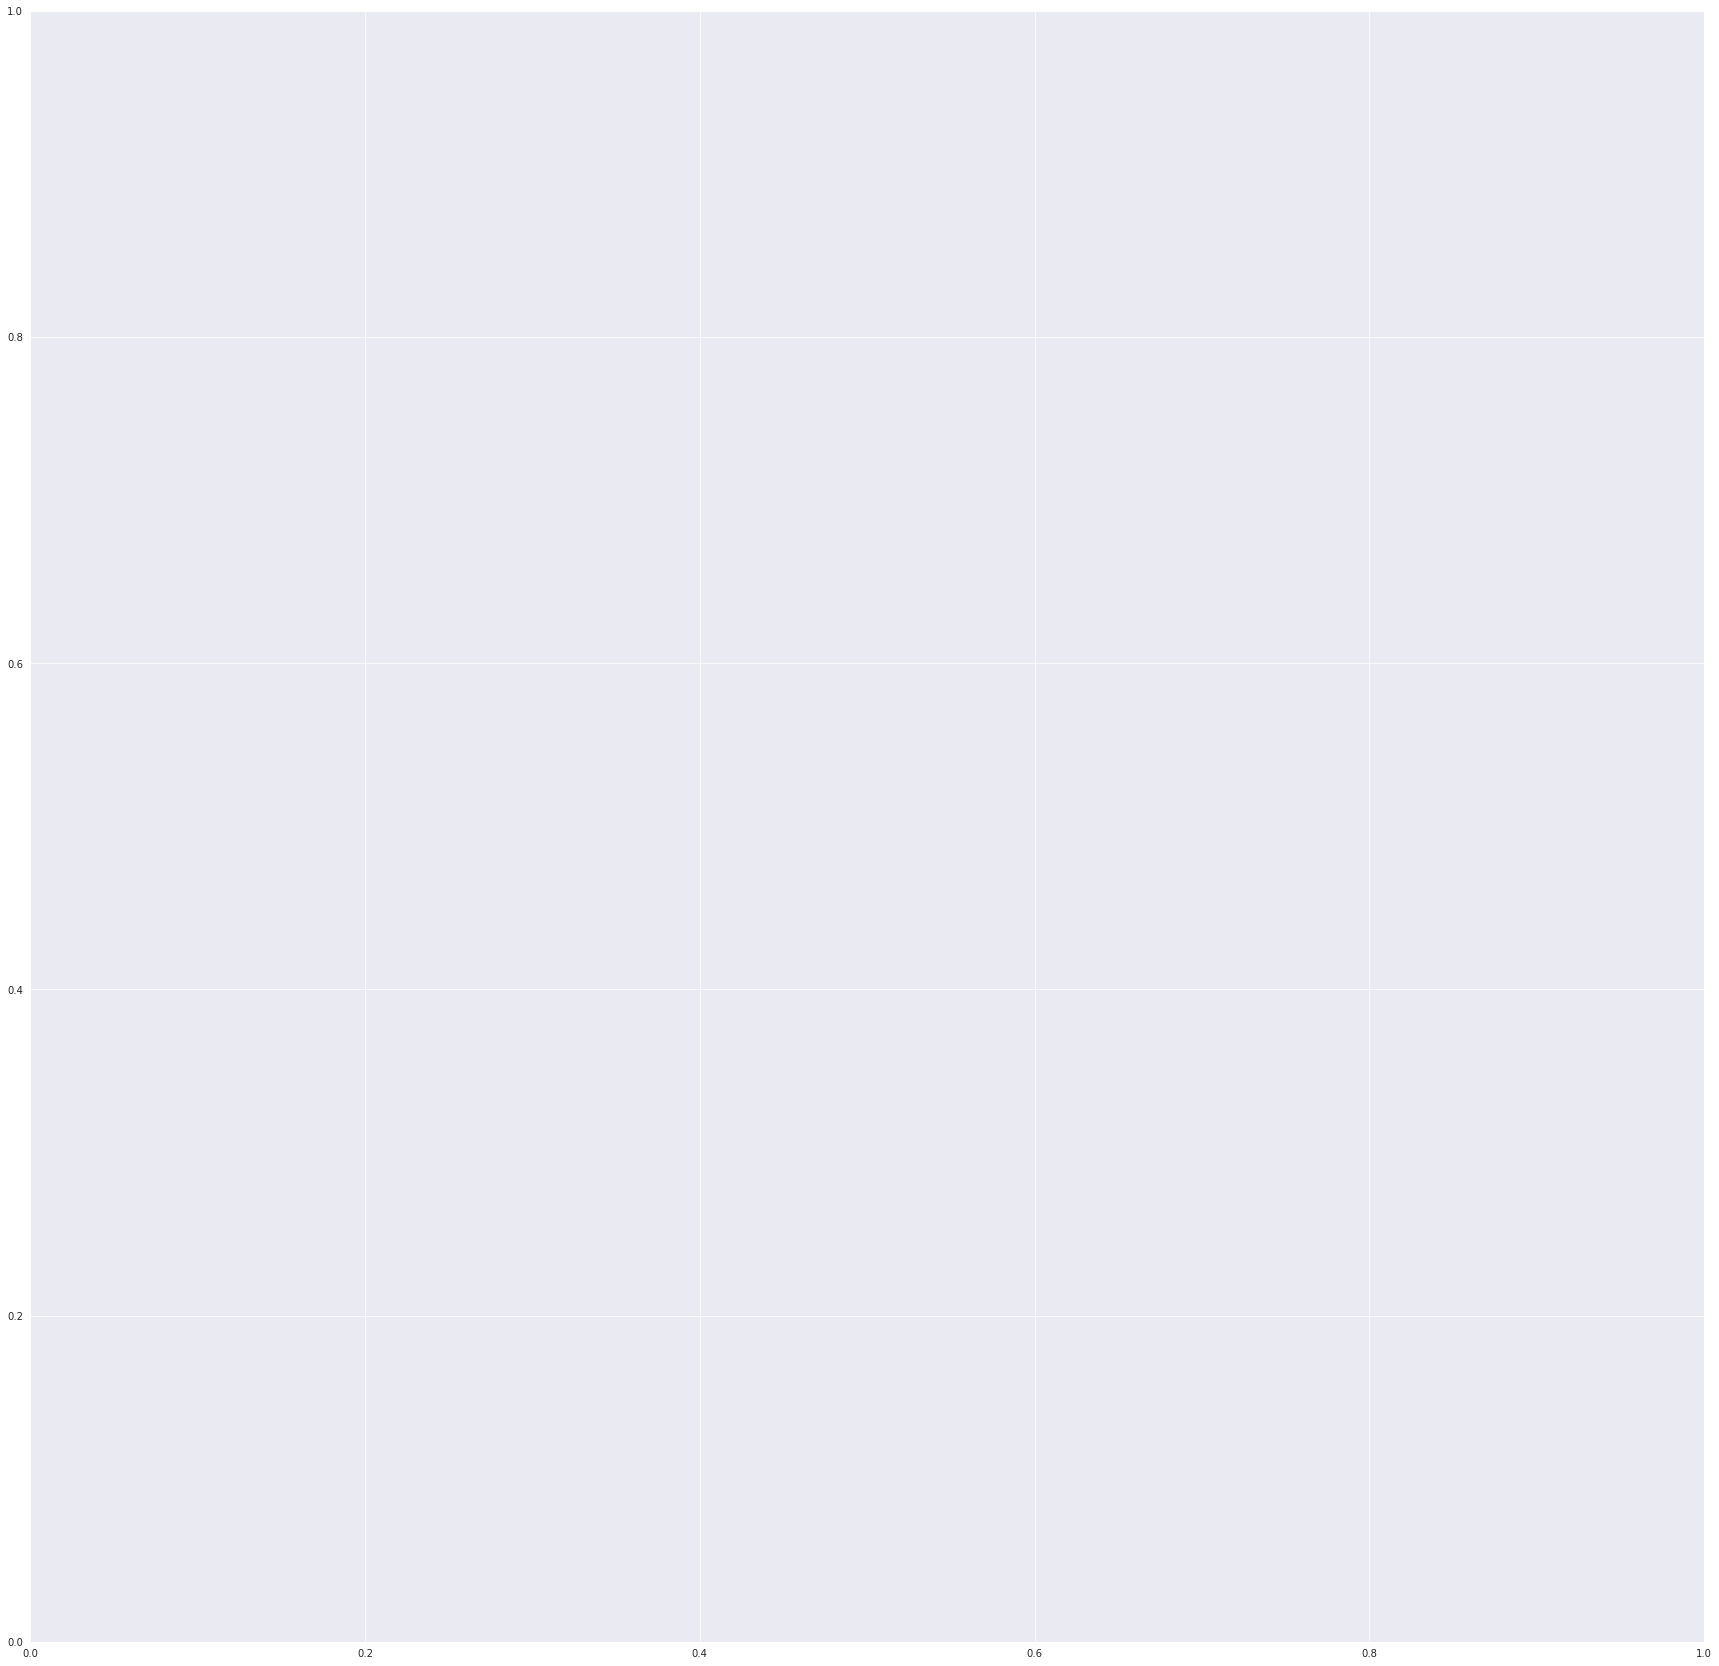

In [60]:
with sns.axes_style('darkgrid'):
    
    f, ax = plt.subplots(figsize=(30, 30))
    
    mask = np.triu(np.ones_like(df_new.corr(), dtype=np.bool))
    
    heatmap = sns.heatmap(df_new.corr(), annot=True, mask=mask, cmap='BrBG', annot_kws={'size': 60});
    
    plt.xticks(fontsize = 40, rotation = 45)
    
    plt.yticks(fontsize = 40, rotation = 45)
    
    heatmap.set_title('Correlation Heatmap of Original DF', fontdict={'fontsize':50}, pad=16);